In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

# 머신러닝 심화반 실습 예제 - 측정 공식(Evaluation Metric)

지금까지 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic Regression) 등 많은 알고리즘을 다뤘지만 현업에서, 그리고 실제 연구에서 이 알고리즘을 사용하기 위해서는 알고리즘의 성능을 정량적으로 측정하고 그 성능을 분석하는게 중요합니다. 이번 시간에는 구현한 머신러닝 모델의 성능을 평가(evaluate)하는 다양한 방법에 대해 살펴볼 것입니다.

측정 공식은 크게 1) 분류(Classification) 문제인지 2) 회귀(Regression) 문제인지에 따라 달라집니다. 먼저 분류 문제부터 보겠습니다.

## 분류(Classification) 문제에서 사용하는 측정 공식

### 오차행렬(Confusion Matrix)

이진 분류 모델의 성능을 평가하는 방법으로 잘 활용되는 방법은 Confusion Matrix를 만들어보는 것입니다. Confusion Matrix는 다음과 같은 2x2 행렬에서 실제값과 예측값이 어떻게 매핑되는지를 나타냅니다. 

<img src="http://drive.google.com/uc?export=view&id=1GmH3AcDyhQbApIb6GyG_CIRGbWIjpdXq" width="800">

이진 분류에서 사용하는 용어 중 "**positive**"와 "**negative**"는 모델이 내놓은 예측값 기준으로 분류한 것이고, "**true**"와 "**false**"는 예측값과 실제값의 일치 여부를 기준으로 분류한 것입니다. 각 경우별로 살펴본다면 다음과 같습니다. <br>
- True Negative(TN): 실제 False인 값을 False라고 예측 (정답)
- False Positive(FP): 실제 False인 값을 True라고 예측 (오답)
- False Negative(FN): 실제 True인 값을 False라고 예측 (오답)
- True Positive(TP): 실제 True인 값을 True라고 예측 (정답) <br>

우선, 분류 모델에 대한 측정 공식을 알아보기 위한 예제 데이터셋을 랜덤으로 생성합니다.

In [2]:
import numpy as np

# numpy를 사용하여 랜덤한 값을 만들 것입니다. 
# numpy의 random(np.random)은 랜덤 값을 생성하는 기능들을 포함하고 있습니다. 
# 코드를 실행할 때마다 랜덤으로 값이 만들어지기 때문에 결과를 고정하기 위해 seed를 고정합니다.
np.random.seed(123)

# np.random.randint()는 최솟값(low), 최대값(high), 개수(size)를 입력받습니다. 
# 최솟값과 최댓값 사이에서 지정한 개수만큼 랜덤하게 정수(Integer)를 추출합니다.
y_true = np.random.randint(low=0, high=2, size=20)
y_pred = np.random.randint(low=0, high=2, size=20)

# y_true와 y_pred의 shape를 확인합니다.
# 20개가 잘 뽑혔다면 (20, 1) 또는 (20, )이 출력됩니다.
print(y_true.shape)
print(y_pred.shape)

# y_true와 y_pred의 값을 확인합니다.
print(y_true)
print(y_pred)

(20,)
(20,)
[0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0]
[0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1]


사이킷런은 Confusion Matrix를 만드는 **confusion_matrix()** API를 제공합니다. 실제값인 y_true와 예측값인 y_pred를 confusion_matrix()의 인자로 입력합니다. 

In [3]:
# 사이킷런의 confusion_matrix를 불러옵니다.
# Evaluation Metric과 관련된 함수는 사이킷런의 metrics에 포함되어 있습니다.
from sklearn.metrics import confusion_matrix

# confusion_matrix()는 실제값(y_true), 예측값(y_pred)을 입력받습니다.
confusion_matrix(y_true, y_pred)

array([[4, 7],
       [7, 2]], dtype=int64)

출력된 Confusion Matrix은 array 형태입니다. 이진 분류의 TN, FP, FN, TP는 위의 표에서와 위치가 같습니다. 즉, TN은 array[0,0], FP는 array[0,1], FN은 array[1,0], TP는 array[1,1]에 해당합니다.

In [4]:
# Confusion Matrix의 각 요소를 가져와봅시다. 
tn = confusion_matrix(y_true, y_pred)[0, 0]
fp = confusion_matrix(y_true, y_pred)[0, 1]
fn = confusion_matrix(y_true, y_pred)[1, 0]
tp = confusion_matrix(y_true, y_pred)[1, 1]

# 다음의 방법으로도 각 요소를 가져올 수 있습니다. 
# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print('tn: %d, fp: %d, fn: %d, tp: %d'%(tn, fp, fn, tp))

tn: 4, fp: 7, fn: 7, tp: 2


### 정확도(Accuracy)

Accuracy는 실제값과 예측값이 얼마나 같은지를 판단하는 지표입니다. 즉, Confusion Matrix에서 True에 해당하는 값인 **TN**과 **TP**에 좌우됩니다. Accuracy는 Confusion Matrix와 관련하여 다음과 같이 정의될 수 있습니다.
$$ Accuracy = \frac{예측값과 실제값이 일치하는 데이터 수}{전체 데이터 수} = \frac{TN + TP}{TN + FP + FN + TP}$$ 

Accuracy를 구하는 기능은 다음과 같이 구현할 수 있습니다. 

In [5]:
# 방법 1

# 예측값과 실제값이 일치하는 데이터의 수를 계산하여 n_correct에 저장합니다.
n_correct = sum(y_pred == y_true)

# 전체 데이터 수로 나누어줍니다.
accuracy_1 = n_correct / len(y_pred)

# 결과를 출력합니다.
accuracy_1

0.3

In [6]:
# 방법 2

# 예측값과 실제값이 일치하는 데이터의 평균을 계산합니다.
accuracy_2 = (y_pred == y_true).mean(axis=0)

# 결과를 출력합니다.
accuracy_2

0.3

사이킷런은 Accuracy를 측정하는 **accuracy_score()** 함수를 제공합니다. 첫 번째 파라미터로 실제값, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

In [7]:
# 사이킷런의 accuracy_score를 불러옵니다.
from sklearn.metrics import accuracy_score

# accuracy_score()는 실제값과 예측값을 입력받습니다.
accuracy_3 = accuracy_score(y_true, y_pred)

# 결과를 출력합니다.
accuracy_3

0.3

그러나, **불균형한 데이터 세트**에서는 Accuracy만으로는 모델 신뢰도가 떨어질 수 있습니다. 예를 들어, 전체 데이터가 100개라고 할 때 10개만 1, 나머지 90개는 0인 데이터 세트가 있다고 가정합시다. 이 데이터 세트에 모든 데이터를 0으로 예측하는 모델을 이용해 Accuracy를 측정하면 90%의 Accuracy를 나타냅니다. 적절하지 않은 모델을 사용하고도 높은 수치가 나타날 수 있다는 것이 Accuracy를 평가 지표로 사용할 때의 문제점입니다. <br>

불균형한 데이터 세트에서 Accuracy의 이러한 **단점을 보완**할 수 있는 평가 지표로 정밀도(Precision)와 재현율(Recall)이 있습니다. Precision와 Recall은 "**positive**" 데이터 세트의 예측 성능에 좀더 초점을 맞춘 평가 지표입니다.

### 정밀도(Precision)

Precision는 "positive"로 예측한 대상 중에 예측값과 실제값이 일치하는 데이터의 비율을 말합니다. 따라서 Precision이 높을수록 좋은 모형입니다. Precision는 Confusion Matrix와 관련하여 다음과 같이 정의될 수 있습니다. 
$$Precision = \frac{TP}{FP + TP} $$

Precision을 구하는 기능은 다음과 같이 구현할 수 있습니다. 

In [8]:
# 위에서 confusion_matrix로 구한 TP(True Positive)와 FP(False Positive)로 Precision을 구합니다.
precision_1 = tp / (fp + tp)

# 결과를 출력합니다. 
precision_1

0.2222222222222222

사이킷런은 Precision을 계산하는 **precision_score()** 함수를 제공합니다. 첫 번째 파라미터로 실제값, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

In [9]:
# 사이킷런의 precision_score를 불러옵니다.
from sklearn.metrics import precision_score

# precision_score()는 실제값과 예측값을 입력받습니다.
precision_2 = precision_score(y_true, y_pred)

# 결과를 출력합니다.
precision_2

0.2222222222222222

### 재현율(Recall)

Recall은 실제값이 "positive"인 대상 중에 예측값과 실제값이 일치하는 데이터의 비율을 말합니다. 따라서 Recall이 높을수록 좋은 모형입니다. Recall은 민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불립니다. Recall은 Confusion Matrix와 관련하여 다음과 같이 정의될 수 있습니다.
$$ Recall = \frac{TP}{FN + TP} $$

Recall을 구하는 기능은 다음과 같이 구현할 수 있습니다.

In [10]:
# 위에서 confusion_matrix로 구한 TP(True Positive)와 FN(False Negative)로 Recall을 구합니다.
recall_1 = tp / (fn + tp)

# 결과를 출력합니다.
recall_1

0.2222222222222222

사이킷런은 재현율을 계산하는 **recall_score()** 함수를 제공합니다. 첫 번째 파라미터로 실제값, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

In [11]:
# 사이킷런의 recall_score를 불러옵니다.
from sklearn.metrics import recall_score

# recall_score()는 실제값과 예측값을 입력받습니다.
recall_2 = recall_score(y_true, y_pred)

# 결과를 출력합니다.
recall_2

0.2222222222222222

상황에 따라 Precision이 더 중요할 수도 있고 Recall이 더 중요한 지표가 될 수도 있습니다. <br>

실제 "negative"인 데이터를 "positive"로 잘못 판단했을 때 업무상 큰 영향을 주는 경우에는 Precision이 상대적으로 더 중요한 지표가 됩니다. 반대로 실제 "positive"인 데이터를 "negative"로 잘못 판단했을 때 업무상 큰 영향을 주는 경우에는 Recall이 상대적으로 더 중요한 지표가 됩니다. <br>

예를 들어 스팸 메일 여부를 판단하는 모델의 경우, 실제 스팸 메일(positive)인데 일반 메일(negative)로 분류한다면 사용자는 불편함을 느끼는 정도일 것입니다. 그러나 실제로 중요한 일반 메일(negative)를 스팸 메일(positive)로 분류하는 경우 업무에 차질이 생기게 될 것입니다. 이때에는 Precision이 더 중요한 지표가 됩니다. <br>

다른 예로, 암 환자를 판단하는 모델에서는 Recall이 더 중요한 지표가 됩니다. 실제로 암 환자(positive)인데 암 환자가 아니라고(negative) 판단하는 경우에 제때 치료를 받지 못하게 되므로 심각한 문제를 일으킬 수 있습니다. 반면 실제로 암 환자가 아닌(negative) 경우에 암 환자(positive)인 것으로 잘못 판단되는 경우에는 재검사 비용이 소모되기는 하겠지만 생명을 앗아가지는 않을 것입니다. <br>

Precision와 Recall의 공식을 살펴보면, 두 지표 모두 TP를 높이는 데 동일하게 초점을 맞추지만, Precision은 FP를, Recall은 FN을 낮추는 데 초점을 맞춥니다. 이러한 특성 때문에 Precision와 Recall은 분류의 성능을 평가하는 데 있어서 서로 보완적으로 작용합니다. <br>

따라서 Precision와 Recall 중 어느 하나만 매우 높고 다른 수치는 매우 낮은 결과를 나타내는 경우 바람직하지 않습니다.

### F1 스코어(F1 Score)

**F 스코어**는 **Precision**과 **Recall**의 **가중조화평균**으로, Precision에 주어지는 가중치를 베타(Beta)라고 합니다. Precision과 Recall을 결합한 지표로 분류의 종합적인 성능 평가에 사용될 수 있습니다. 
$$ F_β=\frac{(1+β^2)(Precision*Recall)}{β^2Precision+Recall} $$

베타가 1인 경우를 특별히 F1 스코어라고 합니다. F1 스코어는 Precision와 Recall이 어느 한쪽으로 치우치지 않을 때 상대적으로 높은 값을 가집니다. 
$$ F1 = \frac{2}{\frac{1}{Recall}+\frac{1}{Precision}} = \frac{2*Precision*Recall}{Precision + Recall} $$ 

f1 score을 구하는 기능은 다음과 같이 구현할 수 있습니다.

In [12]:
# 위에서 구한 precision과 recall 값을 이용합니다.
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)

# 결과를 출력합니다.
f1_1

0.2222222222222222

사이킷런은 F1 스코어를 구하는 **f1_score()**라는 API를 제공합니다. 첫 번째 파라미터로 실제값, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

In [13]:
# 사이킷런의 f1_score를 불러옵니다.
from sklearn.metrics import f1_score

# f1_score()는 실제값과 예측값을 입력받습니다.
f1_2 = f1_score(y_true, y_pred)

# 결과를 출력합니다.
f1_2

0.2222222222222222

사이킷런의 metrics 패키지에서는 Precision, Recall, F1 스코어를 포함한 주요 분류 측정 공식을 구하는 **classification_report()** 함수를 제공합니다. 이 함수는 딕셔너리 형태의 결과값을 반환합니다.

In [14]:
# 사이킷런의 classification_report를 불러옵니다.
from sklearn.metrics import classification_report

# classification_report()는 실제값, 예측값, 을 입력받습니다.
print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.36      0.36      0.36        11
     class 1       0.22      0.22      0.22         9

    accuracy                           0.30        20
   macro avg       0.29      0.29      0.29        20
weighted avg       0.30      0.30      0.30        20



### ROC 곡선과 AUC

ROC 곡선과 AUC에 대해 설명하기 이전에 일단 다음 두 가지 개념에 대해 먼저 알아보겠습니다. <br>
위에서 설명한 **재현율(Recall)**은 참 양성 비율(True Positive Rate, **TPR**)이라고도 하며, 실제로 참인 값들 중에 참으로 정확하게 예측된 값들의 비율을 의미합니다. 재현율은 다음과 같이 정의됩니다. 
$$ TPR = \frac{TP}{FN + TP} $$

**특이도(Specificity)**는 참 음성 비율(True Negative Rate, **TNR**)이라고도 하며, 실제로 거짓인 값들 중에 거짓으로 정확하게 예측된 값들의 비율을 의미합니다. 특이도는 다음과 같이 정의됩니다. 
$$ TNR = \frac{TN}{TN + FP} $$

거짓 양성 비율(False Positive Rate, **FPR**)은 다음과 같이 정의되며, TPR과 TNR은 서로 반비례 관계에 있으므로 TPR과 FRP은 비례 관계에 있습니다. 
$$ FPR = \frac{FP}{TN + FP} = 1 - TNR$$

ROC 곡선(Receiver Operation Characteristic Curve)은 FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선입니다. FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선으로 나타납니다. TPR과 FPR 모두 [0,1]의 범위이며, (0,0)에서 (1,1)을 잇는 곡선입니다. 이때 **ROC 곡선 아래 부분의 면적**을 **AUC(Area Under Curve)**라 하며, 일반적으로 1에 가까울수록 좋은 수치입니다. <br>

사이킷런은 ROC AUC를 구해주는 **roc_auc_score()** API를 제공합니다. 

In [15]:
# 사이킷런의 roc_auc_score를 불러옵니다.
from sklearn.metrics import roc_auc_score

# roc_auc_score는 실제값과 예측값을 입력받습니다.
roc_score = roc_auc_score(y_true, y_pred)

# 결과를 출력합니다.
roc_score

0.29292929292929293

사이킷런에서 **roc_curve()** 함수를 이용하여 ROC를 계산할 수 있습니다. 첫 번째 파라미터로 실제값을, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

[0.         0.63636364 1.        ] [0.         0.22222222 1.        ] [2 1 0]


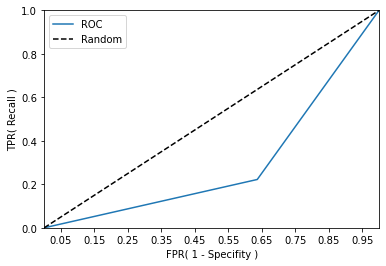

In [16]:
# matplotlib를 불러옵니다.
import matplotlib.pyplot as plt

# 사이킷런의 roc_curve를 불러옵니다.
from sklearn.metrics import roc_curve

%matplotlib inline

# roc를 계산합니다. 
# roc_curve()는 실제값, 예측값을 입력받습니다.
# 거짓 양성 비율(fpr)과 참 양성 비율(tpr), fpr과 tpr 계산에 사용되는 decision 함수의 임계값이 반환됩니다. 
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
print(fpr, tpr, thresholds)

# ROC 곡선을 그래프 곡선으로 그립니다.
plt.plot(fpr, tpr, label="ROC")

# 가운데 대각선 직선을 그립니다.
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# FPR X축의 Scale을 0.1 단위로 변경하고, X, Y축명 등을 설정합니다.
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0, 1); plt.ylim(0, 1)
plt.xlabel('FPR( 1 - Specifity )');
plt.ylabel('TPR( Recall )')
plt.legend()

### Log Loss

Log Loss는 이진 분류 모델을 측정하는 좋은 방법 중 하나이며, 로지스틱 회귀 및 신경망의 최적화 대상이기도 합니다. <br>

Binary Log Loss의 공식은 다음과 같이 정의되며, p는 1을 예측할 확률을 나타냅니다. 
$$ log-loss = -\frac{1}{n}\sum_{i=1}^{n}\log{p_{i}}+(1-y_{i})\log{(1-p_{i})} $$ 

분류 모델의 결과가 예측 확률인 경우 Log Loss는 실제값과 얼마나 다른지에 따른 예측의 불확실성을 고려합니다. 이를 이용하여 모델의 성능을 향상시켜 볼 수 있습니다. 일반적으로 Log Loss를 최소화하면 분류 모델의 Accuracy가 높아집니다. <br>

사이킷런은 Log Loss를 구하는 **log_loss()** 함수를 제공합니다. 첫 번째 파라미터로 실제값을, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

In [17]:
from sklearn.metrics import log_loss

log_loss = log_loss(y_true, y_pred)
log_loss

24.177423335538045

## 2) 측정 공식 - 회귀 모델

이번에는 회귀 모델의 성능을 평가하는 방법에 대해 알아보겠습니다. <br>

수치(Float) 값을 예측하는 모델은 정확도 등의 분류 모델 평가 기준으로 평가하는 것이 애매합니다. 분류 모델은 맞게 분류했는지/아닌지만 평가하면 되지만, 회귀 모델은 정확하게 예측하지 못했더라도, 정답과 비슷하게 맞추면 성능이 좋다고 평가해야 합니다. 따라서 회귀의 평가를 위한 지표는 실제값과 예측값의 차이를 기반으로 합니다. <br>

이때 실제값과 예측값의 차이를 그냥 더하면 +와 -가 섞여서 오류가 상쇄됩니다. 이 때문에 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구합니다. 일반적으로 회귀의 성능을 평가하는 지표로는 **MAE**, **MSE**, **RMSE**, **R^2**, **MSLE**, **RMSLE** 등이 있습니다. 

우선, 회귀 모델에 대한 측정 공식을 알아보기 위한 예제 데이터셋을 랜덤으로 생성합니다

In [18]:
import numpy as np
import pandas as pd

# 코드를 실행할 때마다 랜덤으로 값이 만들어지기 때문에 결과를 고정하기 위해 seed를 고정합니다.
np.random.seed = 123

# np.random.randint()는 최솟값(low), 최대값(high), 개수(size)를 입력받습니다. 
# 최솟값과 최댓값 사이에서 지정한 개수만큼 랜덤하게 정수(Integer)를 추출합니다.
y_true = np.random.randint(low=10, high=900, size=500)

# np.random.random()는 개수(size)를 입력받습니다.
# 구간 [0.0, 1.0)에서 지정한 개수만큼 랜덤하게 Floats를 추출합니다.
y_pred = y_true + np.round(np.random.random(500), decimals=1) * np.random.randint(low=-10, high=10, size=500)

# y_true와 y_pred의 shape를 확인합니다.
# 500개가 잘 뽑혔다면 (500, 1) 또는 (500, )이 출력됩니다.
print(y_true.shape)
print(y_pred.shape)

# y_true와 y_pred의 값을 확인합니다.
y_df = pd.DataFrame(y_true, columns=['y_true'])
y_df['y_pred'] = y_pred
y_df[y_df['y_true'] > y_df['y_pred']].head(10)

(500,)
(500,)


,y_true,y_pred
6,870,868.4
7,190,189.4
8,368,366.2
12,872,864.8
13,421,419.5
14,300,294.0
16,690,682.8
18,847,846.2
19,586,584.6
21,428,423.0


### MAE (Mean Absolute Error)

MAE(Mean Absolute Error)는 실제값과 예측값의 차이를 **절댓값**으로 변환해 평균한 것입니다. 
$$ MAE = \frac{1}{n}\sum_{i=1}^{n}\left|Y_{i}-\hat{Y}_{i}\right| $$

MAE를 구하는 기능은 다음과 같이 구현할 수 있습니다. 

In [19]:
# 예측값과 실제값의 차이의 절댓값을 평균하여 mae_1에 저장합니다.
mae_1 = abs(y_pred - y_true).mean()

# 결과를 출력합니다.
mae_1

2.7018

사이킷런은 MAE를 계산하는 **mean_absolute_error()** 함수를 제공합니다. 첫 번째 파라미터로 실제값을, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

In [20]:
# 사이킷런의 mean_absolute_error를 불러옵니다.
from sklearn.metrics import mean_absolute_error

# mean_absolute_error()는 실제값과 예측값을 입력받습니다.
mae_2 = mean_absolute_error(y_true, y_pred)

# 결과를 출력합니다.
mae_2

2.7018

### MSE (Mean Squared Error)

MSE(Mean Squared Error)는 실제값과 예측값의 차이를 **제곱**해 평균한 것입니다. 
$$ MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_{i}-\hat{Y}_{i})^2 $$

MSE를 구하는 기능은 다음과 같이 구현할 수 있습니다. 

In [21]:
# 예측값과 실제값의 차의 제곱을 평균한 것을 mse_1에 저장합니다.
mse_1 = ((y_pred - y_true)**2).mean()

# 결과를 출력합니다.
mse_1

12.55222

사이킷런은 MSE를 계산하는 **mean_squared_error()** 함수를 제공합니다. 첫 번째 파라미터로 실제값을, 두 번째 파라미터로 예측값을 입력하면 됩니다.

In [22]:
# 사이킷런의 mean_squared_error를 불러옵니다.
from sklearn.metrics import mean_squared_error

# mean_squared_error()는 실제값, 예측값을 입력받습니다.
mse_2 = mean_squared_error(y_true, y_pred)

# 결과를 출력합니다.
mse_2

12.55222

### RMSE (Root Mean Squared Error)

RMSE(Root Mean Squared Error)는 MSE가 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 **루트**를 씌운 것입니다.
$$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(Y_{i}-\hat{Y}_{i})^2} $$

사이킷런은 RMSE를 제공하지 않으므로 RMSE를 구하기 위해서는 MSE에 제곱근을 씌워서 계산하는 함수를 직접 만들어야 합니다. 

In [23]:
# 예측값과 실제값의 차의 제곱을 평균하여 mse에 저장합니다.
mse = ((y_pred - y_true)**2).mean()

# np.sqrt()는 제곱근을 계산해줍니다.
rmse = np.sqrt(mse)

# 결과를 출력합니다.
rmse

3.5429112323059972

### MSLE (Mean Squared Logarithmic Error)

MSLE(Mean Squared Logarithmic Error)는 실제값에 로그를 취한 값과 예측값에 로그를 취한 값의 차이를 **제곱**해 평균한 것입니다. 

$$ MSLE = \frac{1}{n}\sum_{i=1}^{n}(\log{(p_{i}+1)}-\log{(a_{i}+1)})^2 $$

MSLE를 구하는 기능은 다음과 같이 구현할 수 있습니다. 

In [24]:
# np.log1p(x)는 log(1 + x)를 계산해줍니다.
msle_1 = ((np.log1p(y_pred) - np.log1p(y_true))**2).mean()

# 결과를 출력합니다.
msle_1

0.0019157307448924286

사이킷런은 MSLE를 계산하는 **mean_squared_log_error()** 함수를 제공합니다. 첫 번째 파라미터로 실제값을, 두 번째 파라미터로 예측값을 입력하면 됩니다.

In [25]:
# 사이킷런의 mean_squared_log_error를 불러옵니다.
from sklearn.metrics import mean_squared_log_error

# mean_squared_log_error는 실제값과 예측값을 입력받습니다.
msle_2 = mean_squared_log_error(y_true, y_pred)

# 결과를 출력합니다.
msle_2

0.0019157307448924286

### RMSLE (Root Mean Squared Logarithmic Error)

RMSLE(Root Mean Squared Logarithmic Error)는 MSLE가 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSLE에 **루트**를 씌운 것입니다.

$$ RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\log{(p_{i}+1)}-\log{(a_{i}+1)})^2} $$

사이킷런은 RMSLE를 제공하지 않으므로 RMSLE를 구하기 위해서는 MSLE에 제곱근을 씌워서 계산하는 함수를 직접 만들어야 합니다. 

In [26]:
# np.log1p(x)는 log(1 + x)를 계산해줍니다.
msle = ((np.log1p(y_pred) - np.log1p(y_true))**2).mean()

# np.sqrt()는 제곱근을 계산해줍니다.
rmsle = np.sqrt(msle)

# 결과를 출력합니다.
rmsle

0.04376906150344589

### $R^2$

$R^2$는 분산 기반으로 예측 성능을 평가합니다. 실제값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높습니다. 

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{n}(Y_{i}-\hat{Y}_{i})^2}{\sum_{i=1}^{n}(Y_{i}-\bar{Y})^2} $$

$R^2$를 구하는 기능은 다음과 같이 구현할 수 있습니다.

In [27]:
ssres = sum((y_true - y_pred)**2)
sstot = sum((y_true - y_true.mean())**2)
r2_1 = 1 - ssres / sstot

# 결과를 출력합니다.
r2_1

0.9998043528829114

사이킷런은 R^2를 계산하는 **r2_score()** 함수를 제공합니다. 첫 번째 파라미터로 실제값을, 두 번째 파라미터로 예측값을 입력하면 됩니다.

In [28]:
# 사이킷런의 r2_score를 불러옵니다.
from sklearn.metrics import r2_score

# r2_score는 실제값과 예측값을 입력받습니다.
r2_2 = r2_score(y_true, y_pred)

# 결과를 출력합니다.
r2_2

0.9998043528829114

### MAPE (Mean Absolute Percentage Error)

MAE(Mean Absolute Percentage Error)는 Scale Dependent Error의 단점을 커버하는 지표입니다. MAPE의 공식은 아래와 같습니다. 
$$ MAPE = \frac{100}{n}\sum_{i=1}^{n}\left|\frac{Y_{i}-\hat{Y}_{i}}{Y_{i}}\right| $$

MAPE는 예측값과 실제값의 차이를 실제값으로 나눈 값의 절댓값을 평균한 후 100을 곱하여 백분율로 표현합니다. 

In [29]:
# 실제값 대비 예측값과 실제값의 차이의 절댓값을 평균하여 100을 곱합니다.
mape = (abs(y_true - y_pred) / y_true).mean() * 100 

# 결과를 출력합니다.
mape

1.5250170960110454